## Notebook to prepare data to make a comparison between sea level from reanalysis and roms output

Compare: 
- roms area average sea level
- sea level near tide gauge

Data:
- Glorys (zos = sea surface height above the geoid)
- ORA-20C
- ROMS output (TIM: mean dynamic topography (MDT) = mean SSH above the geoid)


In [107]:
# Import necessary packages

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import linregress

## Glorys input and ROMS output comparison from Tim Hermans (without running ROMS myself)

### Average sea level over ROMS area


### Glorys reanalysis sea level
First check input files from Tim

In [2]:
glorys_roms_input_bound = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Tim/model_input/forcing/NS8_smooth013_glorys12v1_bry_19930115_to_20181231.nc')
glorys_roms_input_clim = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Tim/model_input/forcing/NS8_smooth013_glorys12v1_clim_19930115_to_20181231.nc')

In [3]:
glorys_roms_input_bound

<xarray.Dataset>
Dimensions:     (eta_rho: 218, xi_rho: 242, eta_u: 218, xi_u: 241, eta_v: 217, xi_v: 242, eta_psi: 217, xi_psi: 241, s_rho: 30, s_w: 31, ocean_time: 312)
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/43)
    lon_u       (eta_u, xi_u) float64 ...
    lat_u       (eta_u, xi_u) float64 ...
    lon_v       (eta_v, xi_v) float64 ...
    lat_v       (eta_v, xi_v) float64 ...
    lat_psi     (eta_psi, xi_psi) float64 ...
    lon_psi     (eta_psi, xi_psi) float64 ...
    ...          ...
    vbar_south  (ocean_time, xi_v) float32 ...
    vbar_north  (ocean_time, xi_v) float32 ...
    ubar_west   (ocean_time, eta_u) float32 ...
    ubar_east   (ocean_time, eta_u) float32 ...
    ubar_south  (ocean_time, xi_u) float32 ...
    ubar_north  (ocean_time, xi_u) float32 ...
Attributes:
    title:        Boundary forcing file (BRY) used for forcing of the ROMS model
    description:  Created for the /users/thermans/Documents/Modeling/ROMS/pre...
    grdFile:      /users/thermans/Documents/Modeling/ROMS/preprocessing/grid/...
    history:      Created Wed Nov 20 08:19:52 2019
    source:       Tim Hermans (tim.hermans (at) nioz.nl)
    type:         File in NETCDF4 format created using MODEL2ROMS
    link:         https://github.com/trondkr/model2roms
    Conventions:  CF-1.0

In [4]:
glorys_roms_input_bound.vbar_west

<xarray.DataArray 'vbar_west' (ocean_time: 312, eta_v: 217)>
array([[ 0.005531,  0.000596, -0.001227, ...,  0.008331,  0.01622 ,  0.024561],
       [-0.059439, -0.057454, -0.0542  , ...,  0.006188,  0.012203,  0.017946],
       [-0.014961, -0.01767 , -0.017854, ...,  0.019011,  0.022181,  0.02794 ],
       ...,
       [-0.039606, -0.045893, -0.044744, ..., -0.004667, -0.002989,  0.000898],
       [ 0.023041,  0.016752,  0.022053, ...,  0.019137,  0.03299 ,  0.043683],
       [ 0.063645,  0.045146,  0.040861, ..., -0.00669 , -0.000422,  0.00988 ]],
      dtype=float32)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
Dimensions without coordinates: eta_v
Attributes:
    long_name:  2D v-momentum western boundary condition
    units:      meter second-1
    field:      vbar_west, scalar, series
    time:       ocean_time

In [5]:
glorys_roms_input_clim

<xarray.Dataset>
Dimensions:     (eta_rho: 218, xi_rho: 242, eta_u: 218, xi_u: 241, eta_v: 217, xi_v: 242, eta_psi: 217, xi_psi: 241, s_rho: 30, s_w: 31, ocean_time: 312)
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/28)
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
    lon_u       (eta_u, xi_u) float64 ...
    lat_u       (eta_u, xi_u) float64 ...
    lon_v       (eta_v, xi_v) float64 ...
    lat_v       (eta_v, xi_v) float64 ...
    ...          ...
    v           (ocean_time, s_rho, eta_v, xi_v) float32 ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 ...
    ubar        (ocean_time, eta_u, xi_u) float32 ...
    vbar        (ocean_time, eta_v, xi_v) float32 ...
Attributes:
    title:        Climatology forcing file (CLIM) used for forcing the ROMS m...
    description:  Created for grid file: /users/thermans/Documents/Modeling/R...
    grd_file:     Gridfile: /users/thermans/Documents/Modeling/ROMS/preproces...
    history:      Created Tue Nov 19 17:44:29 2019
    source:       Tim Hermans (tim.hermans (at) nioz.nl)
    type:         File in NETCDF4 format created using MODEL2ROMS
    link:         https://github.com/trondkr/model2roms
    Conventions:  CF-1.0

These files do not include sea-level. This means I should download Glorys myself.

In [6]:
# Import Glorys reanalysis data
glorys12v1_monthly = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/lateral forcing/Glorys12v1/SSH/cmems_mod_glo_phy_my_0.083_P1M-m_1648030292571.nc')

In [7]:
glorys12v1_monthly.zos

<xarray.DataArray 'zos' (time: 324, latitude: 409, longitude: 457)>
[60559812 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 32.0 32.08 32.17 32.25 ... 65.83 65.92 66.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
  * longitude  (longitude) float32 -24.0 -23.92 -23.83 ... 13.83 13.92 14.0
Attributes:
    long_name:      Sea surface height
    standard_name:  sea_surface_height_above_geoid
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]

In [8]:
glorys12v1_monthly.time

<xarray.DataArray 'time' (time: 324)>
array(['1993-01-16T12:00:00.000000000', '1993-02-15T00:00:00.000000000',
       '1993-03-16T12:00:00.000000000', ..., '2019-10-16T12:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
Attributes:
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    _CoordinateAxisType:  Time
    valid_min:            377316.0
    valid_max:            613236.0

In [9]:
glorys12v1 = glorys12v1_monthly.groupby('time.year').mean('time')

In [10]:
glorys12v1

<xarray.Dataset>
Dimensions:    (latitude: 409, year: 27, longitude: 457)
Coordinates:
  * latitude   (latitude) float32 32.0 32.08 32.17 32.25 ... 65.83 65.92 66.0
  * longitude  (longitude) float32 -24.0 -23.92 -23.83 ... 13.83 13.92 14.0
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019
Data variables:
    zos        (year, latitude, longitude) float32 -0.1318 -0.1329 ... nan nan

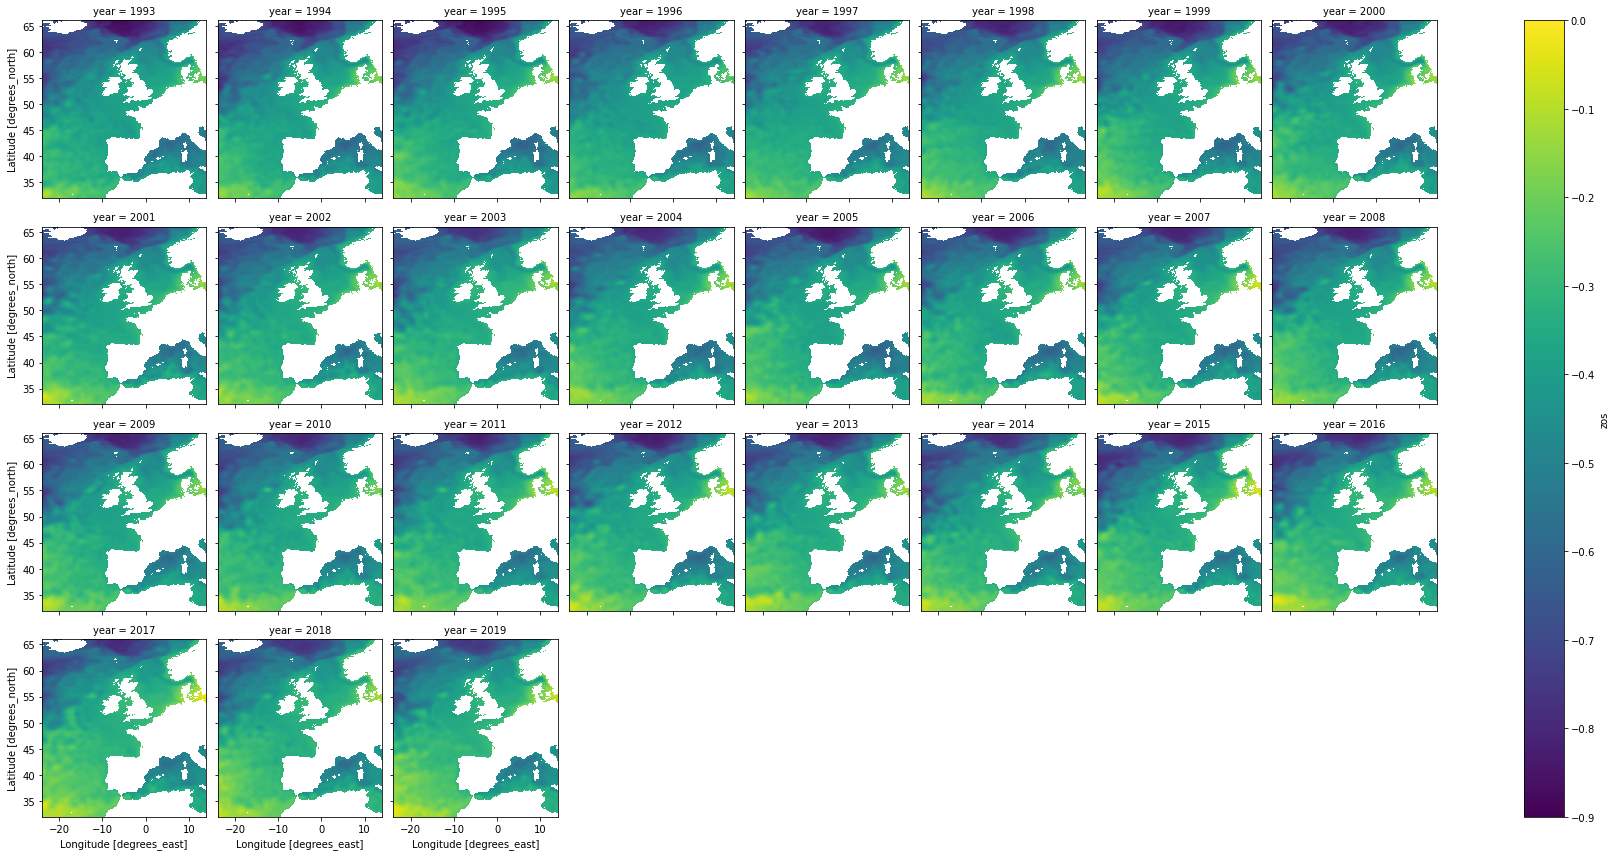

In [11]:
glorys12v1.zos.plot(col = 'year', col_wrap = 8, vmin = -0.9, vmax = 0) # Sea level [m]

#### ROMS output sea level

In [56]:
glorys_roms_output_bound_nonevar = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Tim/model_output/Exp_NoneVar/NorthSea8_avg_zeta_timeseries_annual.nc')
glorys_roms_output_bound_allvar = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Tim/model_output/Exp_AllVar_noSLP/NorthSea8_avg_zeta_timeseries_annual.nc')

In [13]:
glorys_roms_output_bound_nonevar

<xarray.Dataset>
Dimensions:          (ocean_time: 26, bnds: 2, eta_rho: 218, xi_rho: 242)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 1993-06-30T06:00:00 ... 2018...
    lon_rho          (eta_rho, xi_rho) float64 ...
    lat_rho          (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: bnds, eta_rho, xi_rho
Data variables:
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    zeta             (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/35)
    CDI:               Climate Data Interface version 1.9.7.1 (http://mpimet....
    Conventions:       CF-1.4, SGRID-0.3
    history:           Sun Dec 15 10:55:17 2019: cdo yearmonmean NorthSea8_av...
    file:              NorthSea8_avg_0001.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS nonlinear model averages file
    ...                ...
    compiler_flags:    -frepack-arrays -O3 -ffast-math -
    tiling:            010x008
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORTH_SEA8, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, ATM...
    frequency:         mon
    CDO:               Climate Data Operators version 1.9.7.1 (http://mpimet....

In [14]:
glorys_roms_output_bound_nonevar.ocean_time

<xarray.DataArray 'ocean_time' (ocean_time: 26)>
array(['1993-06-30T06:00:00.000000000', '1994-06-30T06:00:00.000000000',
       '1995-06-30T06:00:00.000000000', '1996-07-03T00:00:00.000000000',
       '1997-07-03T00:00:00.000000000', '1998-07-03T00:00:00.000000000',
       '1999-07-03T00:00:00.000000000', '2000-07-02T00:00:00.000000000',
       '2001-07-02T00:00:00.000000000', '2002-07-02T00:00:00.000000000',
       '2003-07-02T00:00:00.000000000', '2004-07-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2006-07-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2008-06-30T00:00:00.000000000',
       '2009-06-30T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2011-06-30T00:00:00.000000000', '2012-06-30T06:00:00.000000000',
       '2013-06-30T06:00:00.000000000', '2014-06-30T06:00:00.000000000',
       '2015-06-30T06:00:00.000000000', '2016-07-03T00:00:00.000000000',
       '2017-07-03T00:00:00.000000000', '2018-07-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 1993-06-30T06:00:00 ... 2018-07-03
Attributes:
    standard_name:  time
    long_name:      averaged time since initialization
    bounds:         ocean_time_bnds
    axis:           T

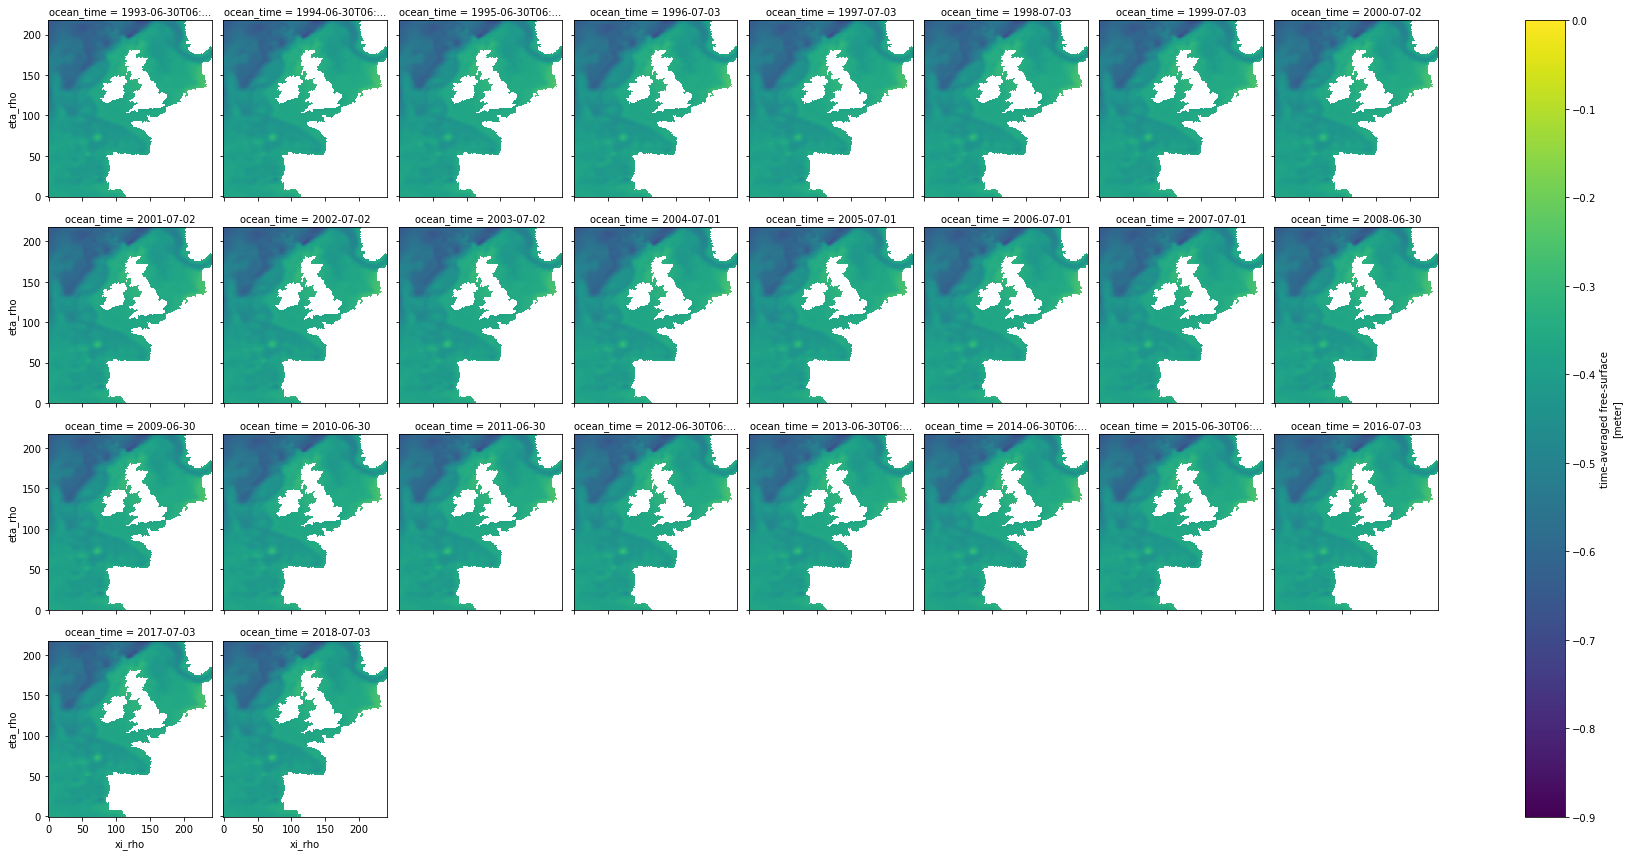

In [15]:
glorys_roms_output_bound_nonevar.zeta.plot(col = 'ocean_time', col_wrap = 8, vmin = -0.9, vmax = 0) # Sea level [m]

##### Since the outline of these figures seem correct, the axes labels are probably wrong and should just be lat and lon.

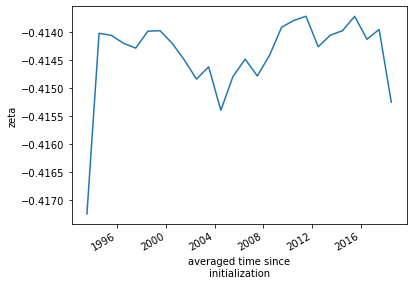

In [16]:
# Obtain average over ROMS area
glorys_roms_output_bound_nonevar.zeta.mean('eta_rho').mean('xi_rho').plot()

In [57]:
glorys_roms_output_bound_allvar

<xarray.Dataset>
Dimensions:          (ocean_time: 26, bnds: 2, eta_rho: 218, xi_rho: 242)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 1993-06-30T06:00:00 ... 2018...
    lon_rho          (eta_rho, xi_rho) float64 ...
    lat_rho          (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: bnds, eta_rho, xi_rho
Data variables:
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    zeta             (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/35)
    CDI:               Climate Data Interface version 1.9.7.1 (http://mpimet....
    Conventions:       CF-1.4, SGRID-0.3
    history:           Wed Jan 08 15:55:48 2020: cdo yearmonmean NorthSea8_av...
    file:              NorthSea8_avg_0001.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS nonlinear model averages file
    ...                ...
    compiler_flags:    -frepack-arrays -O3 -ffast-math -
    tiling:            010x008
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORTH_SEA8, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, AVE...
    frequency:         mon
    CDO:               Climate Data Operators version 1.9.7.1 (http://mpimet....

In [58]:
glorys_roms_output_bound_allvar.ocean_time

<xarray.DataArray 'ocean_time' (ocean_time: 26)>
array(['1993-06-30T06:00:00.000000000', '1994-06-30T06:00:00.000000000',
       '1995-06-30T06:00:00.000000000', '1996-07-03T00:00:00.000000000',
       '1997-07-03T00:00:00.000000000', '1998-07-03T00:00:00.000000000',
       '1999-07-03T00:00:00.000000000', '2000-07-02T00:00:00.000000000',
       '2001-07-02T00:00:00.000000000', '2002-07-02T00:00:00.000000000',
       '2003-07-02T00:00:00.000000000', '2004-07-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2006-07-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2008-06-30T00:00:00.000000000',
       '2009-06-30T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2011-06-30T00:00:00.000000000', '2012-06-30T06:00:00.000000000',
       '2013-06-30T06:00:00.000000000', '2014-06-30T06:00:00.000000000',
       '2015-06-30T06:00:00.000000000', '2016-07-03T00:00:00.000000000',
       '2017-07-03T00:00:00.000000000', '2018-07-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 1993-06-30T06:00:00 ... 2018-07-03
Attributes:
    standard_name:  time
    long_name:      averaged time since initialization
    bounds:         ocean_time_bnds
    axis:           T

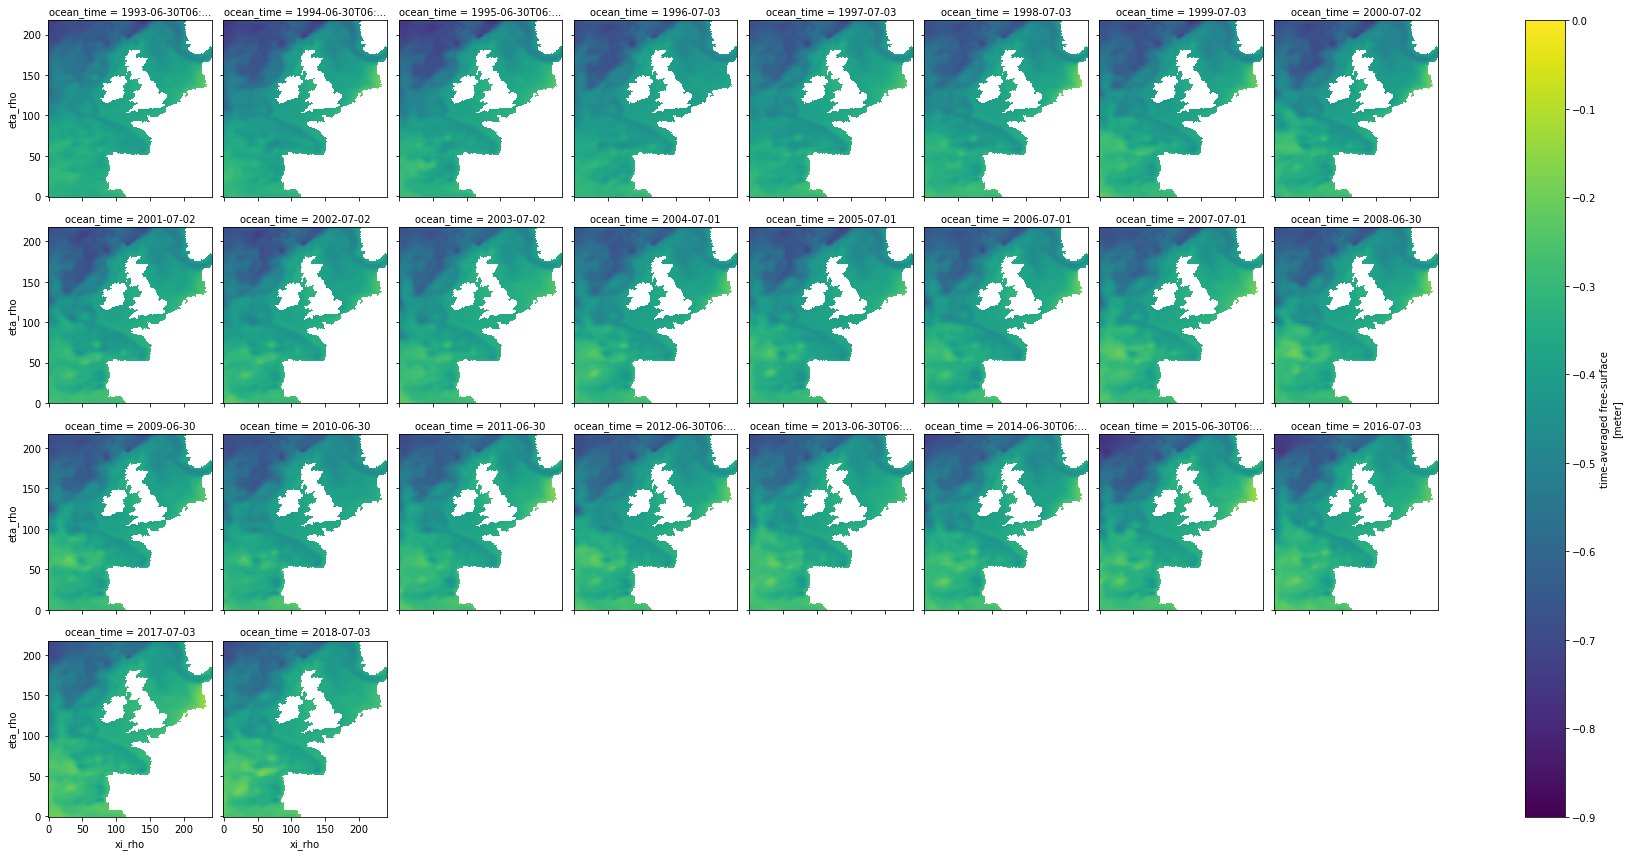

In [59]:
glorys_roms_output_bound_allvar.zeta.plot(col = 'ocean_time', col_wrap = 8, vmin = -0.9, vmax = 0) # Sea level [m]

##### Since the outline of these figures seem correct, the axes labels are probably wrong and should just be lat and lon.

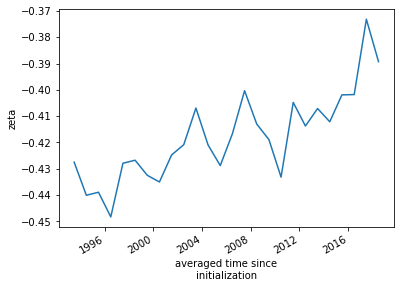

In [60]:
# Obtain average over ROMS area
glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho').plot()

In [17]:
# Make extent of the Glorys12v1 data similar to ROMS
glorys12v1_shr = glorys12v1.where((glorys12v1.latitude > 36) & (glorys12v1.latitude < 62) & (glorys12v1.longitude > -20) & (glorys12v1.longitude < 10), drop = True)

# Drop 2019
glorys12v1_shr = glorys12v1_shr.where(glorys12v1.year < 2019, drop=True)

In [18]:
glorys12v1_shr

<xarray.Dataset>
Dimensions:    (year: 26, latitude: 311, longitude: 359)
Coordinates:
  * latitude   (latitude) float32 36.08 36.17 36.25 36.33 ... 61.75 61.83 61.92
  * longitude  (longitude) float32 -19.92 -19.83 -19.75 ... 9.75 9.833 9.917
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2015 2016 2017 2018
Data variables:
    zos        (year, latitude, longitude) float32 -0.3247 -0.3264 ... nan nan

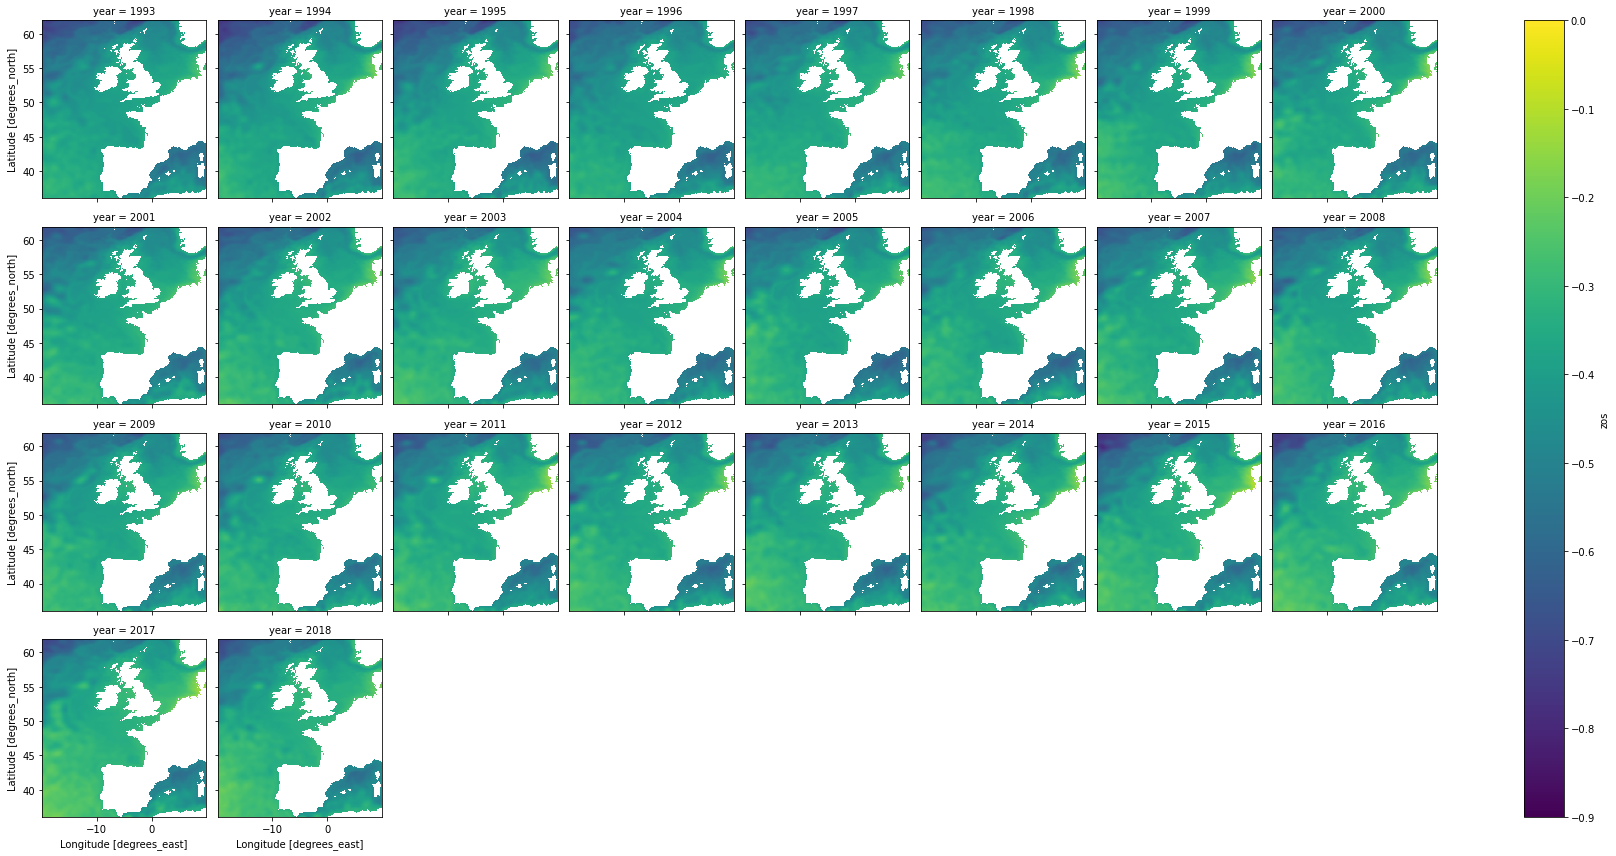

In [19]:
glorys12v1_shr.zos.plot(col = 'year', col_wrap = 8, vmin = -0.9, vmax = 0) # Sea level [m]

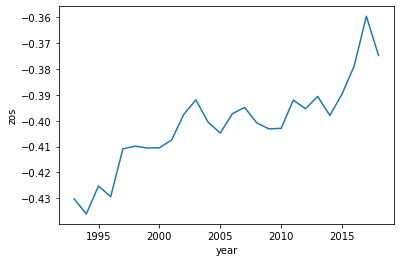

In [23]:
# Obtain average over ROMS area
glorys12v1_shr.zos.mean('longitude').mean('latitude').plot()

(array([-4.4, -4.3, -4.2, -4.1, -4. , -3.9, -3.8, -3.7, -3.6, -3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

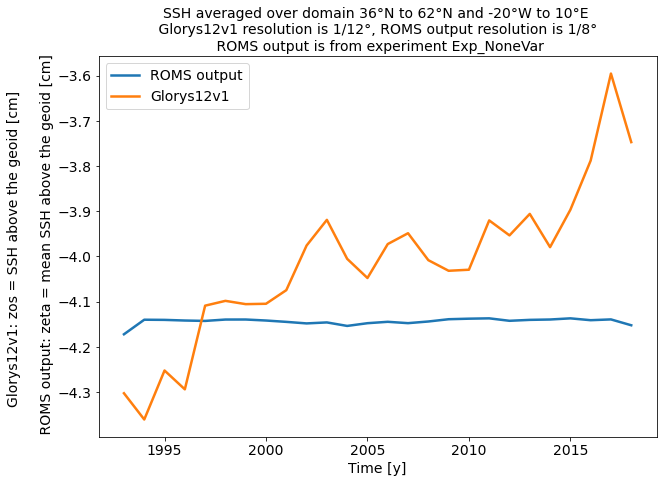

In [54]:
plt.figure(figsize = (10,7))

plt.plot(glorys_roms_output_bound_nonevar.ocean_time.dt.year, glorys_roms_output_bound_nonevar.zeta.mean('eta_rho').mean('xi_rho')*10, linewidth=2.5, label = 'ROMS output')
plt.plot(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10, linewidth=2.5, label = 'Glorys12v1')

plt.xlabel('Time [y]', fontsize =  14)
plt.ylabel('Glorys12v1: zos = SSH above the geoid [cm] \n\n ROMS output: zeta = mean SSH above the geoid [cm]', fontsize = 14)
plt.title('SSH averaged over domain 36°N to 62°N and -20°W to 10°E \n Glorys12v1 resolution is 1/12°, ROMS output resolution is 1/8° \n ROMS output is from experiment Exp_NoneVar', fontsize = 14)

plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

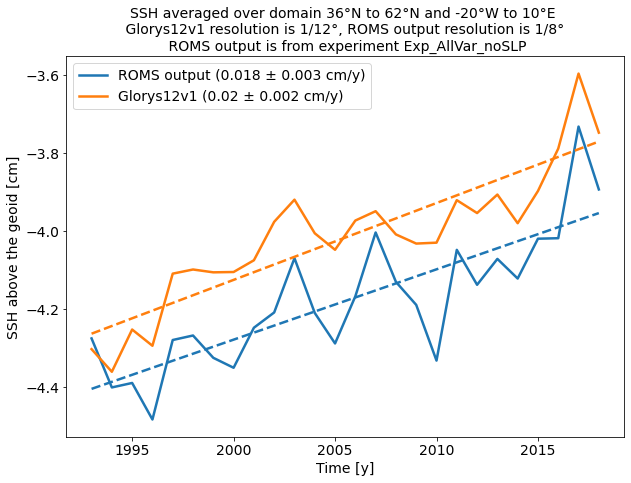

In [119]:
plt.figure(figsize = (10,7))

glorys_res = linregress(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10)
glorys_trend = linregress(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10).slope
glorys_se = linregress(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10).stderr

roms_res = linregress(glorys_roms_output_bound_allvar.ocean_time.dt.year, glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho')*10)
roms_trend = linregress(glorys_roms_output_bound_allvar.ocean_time.dt.year, glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho')*10).slope
roms_se = linregress(glorys_roms_output_bound_allvar.ocean_time.dt.year, glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho')*10).stderr

plt.plot(glorys_roms_output_bound_allvar.ocean_time.dt.year, glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho')*10, linewidth=2.5, label = f'ROMS output ({round(roms_trend, 3)} ± {round(roms_se, 3)} cm/y)')
plt.plot(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10, linewidth=2.5, label = f'Glorys12v1 ({round(glorys_trend, 3)} ± {round(glorys_se, 3)} cm/y)')

plt.plot(glorys_roms_output_bound_allvar.ocean_time.dt.year, roms_res.intercept + roms_res.slope*glorys_roms_output_bound_allvar.ocean_time.dt.year, 'tab:blue', linestyle = '--', linewidth = 2.5)
plt.plot(glorys12v1_shr.year, glorys_res.intercept + glorys_res.slope*glorys12v1_shr.year, 'tab:orange', linestyle = '--', linewidth = 2.5)



plt.xlabel('Time [y]', fontsize =  14)
plt.ylabel('SSH above the geoid [cm]', fontsize = 14)
plt.title('SSH averaged over domain 36°N to 62°N and -20°W to 10°E \n Glorys12v1 resolution is 1/12°, ROMS output resolution is 1/8° \n ROMS output is from experiment Exp_AllVar_noSLP', fontsize = 14)

plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('/Users/iriskeizer/Documents/ROMS/figures/phase0/glorys_vs_roms/tim output/roms_area_averaged_ssh_glorys12_timoutput8')

In [109]:
glorys_trend

0.019731544755462908

### Comparison for locations near Dutch tide gauges

In [65]:
# Import tide gauge coordinates
tg_coords = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/Coordinates/tgstations.csv', index_col = 'station')

In [80]:
tg_coords

,lat,lon
station,,
Vlissingen,51.442222,3.596111
Hoek v. Holland,51.977500,4.120000
Den Helder,52.964444,4.745000
Delfzijl,53.326389,6.933056
Harlingen,53.175556,5.409444
IJmuiden,52.462222,4.554722


In [94]:
tg_coords_roms

,lat,lon
station,,
Vlissingen,0,3.596111
Hoek v. Holland,1,4.120000
Den Helder,0,4.745000
Delfzijl,0,6.933056
Harlingen,0,5.409444
IJmuiden,0,4.554722


In [93]:
tg_coords_roms = tg_coords.copy()
tg_coords_roms['lat'] = [51.45893109,1,0,0,0,0]
tg_coords_roms['lon'] = [3.61570248,4.11157025,0,0,0,0]

In [105]:
glorys_roms_output_bound_allvar.where((glorys_roms_output_bound_allvar.lon_rho > 4.0) & (glorys_roms_output_bound_allvar.lon_rho < 4.3), drop = True).lon_rho

<xarray.DataArray 'lon_rho' (eta_rho: 218, xi_rho: 2)>
array([[4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
...
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719],
       [4.11157025, 4.23553719]])
Coordinates:
    lon_rho  (eta_rho, xi_rho) float64 4.112 4.236 4.112 ... 4.236 4.112 4.236
    lat_rho  (eta_rho, xi_rho) float64 35.88 35.88 36.03 ... 61.87 61.96 61.96
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    standard_name:        longitude
    long_name:            longitude of RHO-points
    units:                degree_east
    _CoordinateAxisType:  Lon

In [106]:
glorys_roms_output_bound_allvar.where((glorys_roms_output_bound_allvar.lat_rho > 51.9) & (glorys_roms_output_bound_allvar.lat_rho < 52), drop = True).lat_rho

<xarray.DataArray 'lat_rho' (eta_rho: 1, xi_rho: 242)>
array([[51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
...
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966, 51.92748966, 51.92748966, 51.92748966,
        51.92748966, 51.92748966]])
Coordinates:
    lon_rho  (eta_rho, xi_rho) float64 -19.94 -19.81 -19.69 ... 9.69 9.814 9.938
    lat_rho  (eta_rho, xi_rho) float64 51.93 51.93 51.93 ... 51.93 51.93 51.93
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    standard_name:        latitude
    long_name:            latitude of RHO-points
    units:                degree_north
    _CoordinateAxisType:  Lat

In [87]:
glorys_roms_output_bound_allvar.where(glorys_roms_output_bound_allvar.lon_rho == 3.596111, drop = True)

<xarray.Dataset>
Dimensions:          (ocean_time: 26, bnds: 2, eta_rho: 0, xi_rho: 0)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 1993-06-30T06:00:00 ... 2018...
    lon_rho          (eta_rho, xi_rho) float64 
    lat_rho          (eta_rho, xi_rho) float64 
Dimensions without coordinates: bnds, eta_rho, xi_rho
Data variables:
    ocean_time_bnds  (ocean_time, bnds, eta_rho, xi_rho) datetime64[ns] 
    zeta             (ocean_time, eta_rho, xi_rho) float32 
Attributes: (12/35)
    CDI:               Climate Data Interface version 1.9.7.1 (http://mpimet....
    Conventions:       CF-1.4, SGRID-0.3
    history:           Wed Jan 08 15:55:48 2020: cdo yearmonmean NorthSea8_av...
    file:              NorthSea8_avg_0001.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS nonlinear model averages file
    ...                ...
    compiler_flags:    -frepack-arrays -O3 -ffast-math -
    tiling:            010x008
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORTH_SEA8, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, AVE...
    frequency:         mon
    CDO:               Climate Data Operators version 1.9.7.1 (http://mpimet....

In [78]:
glorys_roms_output_bound_allvar.sel(lat_rho = tg_coords['lat'][station], lon_rho = tg_coords['lon'][station], method='Nearest')

KeyError: 'no index found for coordinate lat_rho'

In [73]:
tg_coords['lat'][station]

51.442222

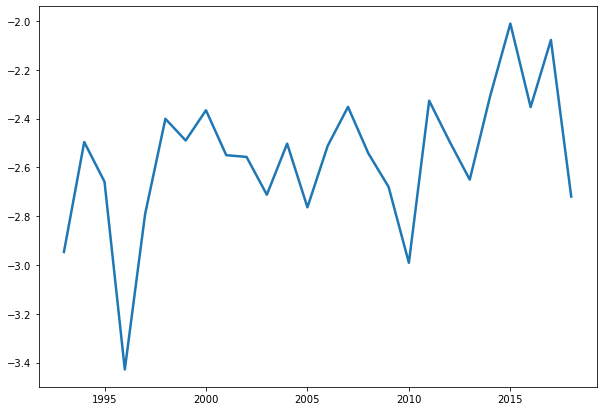

In [76]:
# Make plot for vlissingen
station = 'Vlissingen'

plt.figure(figsize = (10,7))

plt.plot(glorys_roms_output_bound_allvar.ocean_time.dt.year, *10, linewidth=2.5, label = 'ROMS output')
plt.plot(glorys12v1_shr.year, glorys12v1_shr.zos.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method='Nearest')*10, linewidth = 2.5, label = 'Glorys12v1')



In [ ]:
plt.plot(glorys_roms_output_bound_allvar.ocean_time.dt.year, glorys_roms_output_bound_allvar.zeta.mean('eta_rho').mean('xi_rho')*10, linewidth=2.5, label = 'ROMS output')
plt.plot(glorys12v1_shr.year, glorys12v1_shr.zos.mean('longitude').mean('latitude')*10, linewidth=2.5, label = 'Glorys12v1')

plt.xlabel('Time [y]', fontsize =  14)
plt.ylabel('Glorys12v1: zos = SSH above the geoid [cm] \n\n ROMS output: zeta/MDT = mean SSH above the geoid [cm]', fontsize = 14)
plt.title('SSH averaged over domain 36°N to 62°N and -20°W to 10°E \n Glorys12v1 resolution is 1/12°, ROMS output resolution is 1/8° \n ROMS output is from experiment Exp_AllVar_noSLP', fontsize = 14)

plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

### ORA-20C input and ROMS output comparison 

#### Average sea level over ROMS area

In [20]:
ORA_opa0_eta = xr.open_dataset('/Volumes/Iris 300 GB/opa0/so_ora20c_1m_1900_grid_1x1.nc')

In [21]:
ORA_opa0_eta.so

<xarray.DataArray 'so' (time: 12, dep: 42, lat: 180, lon: 360)>
[32659200 values with dtype=float32]
Coordinates:
    depth    (dep) float32 ...
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 1900-12-16T12:00:00
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: dep
Attributes:
    _CoordinateAxes:    time depth lat lon
    associate:          time depth lat lon
    interval_write:     monthly
    long_name:          Salinity
    offline_operation:  time average and spatial interpolation
    standard_name:      Salinity
    units:              psu